In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [2]:
with open('data/2015.csv', 'r') as f:
    df = pd.read_csv(f) 

df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.split('(').str[0]
for col in df.columns:
    if col[-1] == '_':
        df = df.rename(columns={col:col[:-1]})
df.head()

,country,region,happiness_rank,happiness_score,standard_error,economy,family,health,freedom,trust,generosity,dystopia_residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Histogram of happiness score

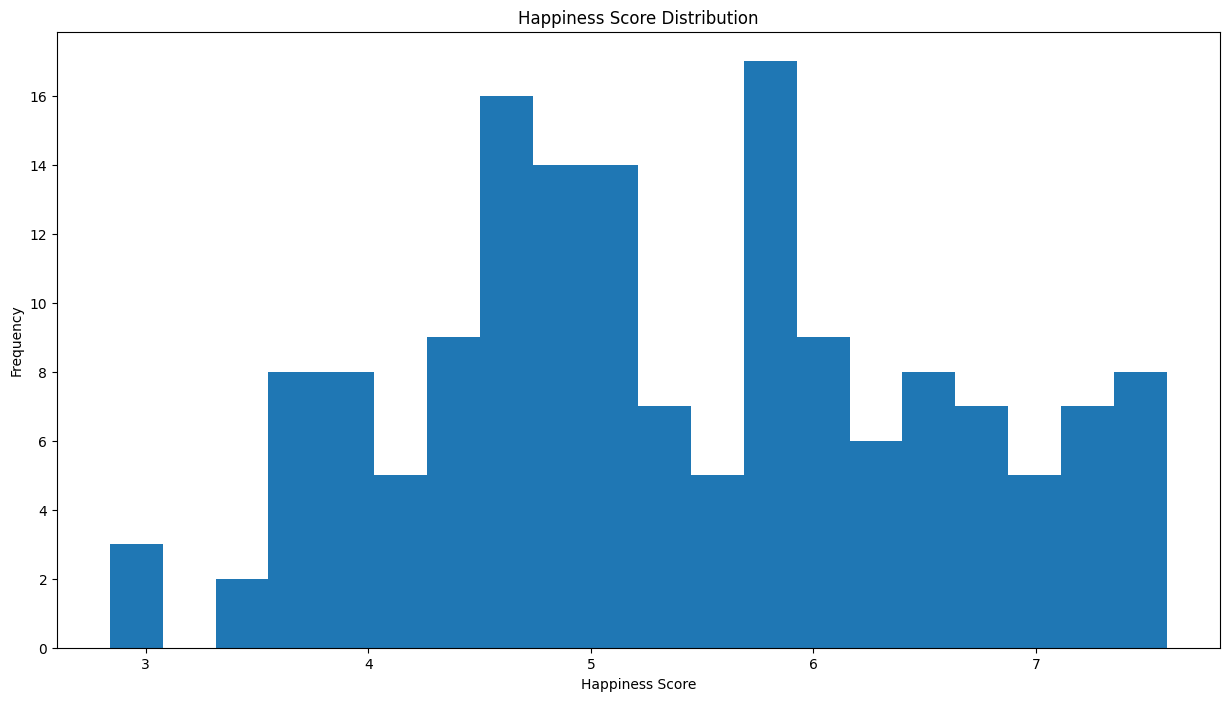

In [4]:
plt.figure(figsize=(15,8))
plt.hist(df['happiness_score'], bins=20)
plt.title('Happiness Score Distribution')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

In [5]:
df.region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

Clusters
- Western Europe, North America, Australia and New Zealand (o)
- Central and Eastern Europe, Southeastern Asia, Latin America and Caribbean (^)
- Eastern Asia, Middle East and Northern Africa (^)
- Sub-Saharan Africa, Southern Asia (+)

In [6]:
df['marker'] = df['region'].map({'Australia and New Zealand': 'o', 'Central and Eastern Europe': '^', 'Eastern Asia': '^', 'Latin America and Caribbean': '^', 'Middle East and Northern Africa': '^', 'North America': 'o', 'Southeastern Asia': '^', 'Southern Asia': '+', 'Sub-Saharan Africa': '+', 'Western Europe': 'o'})

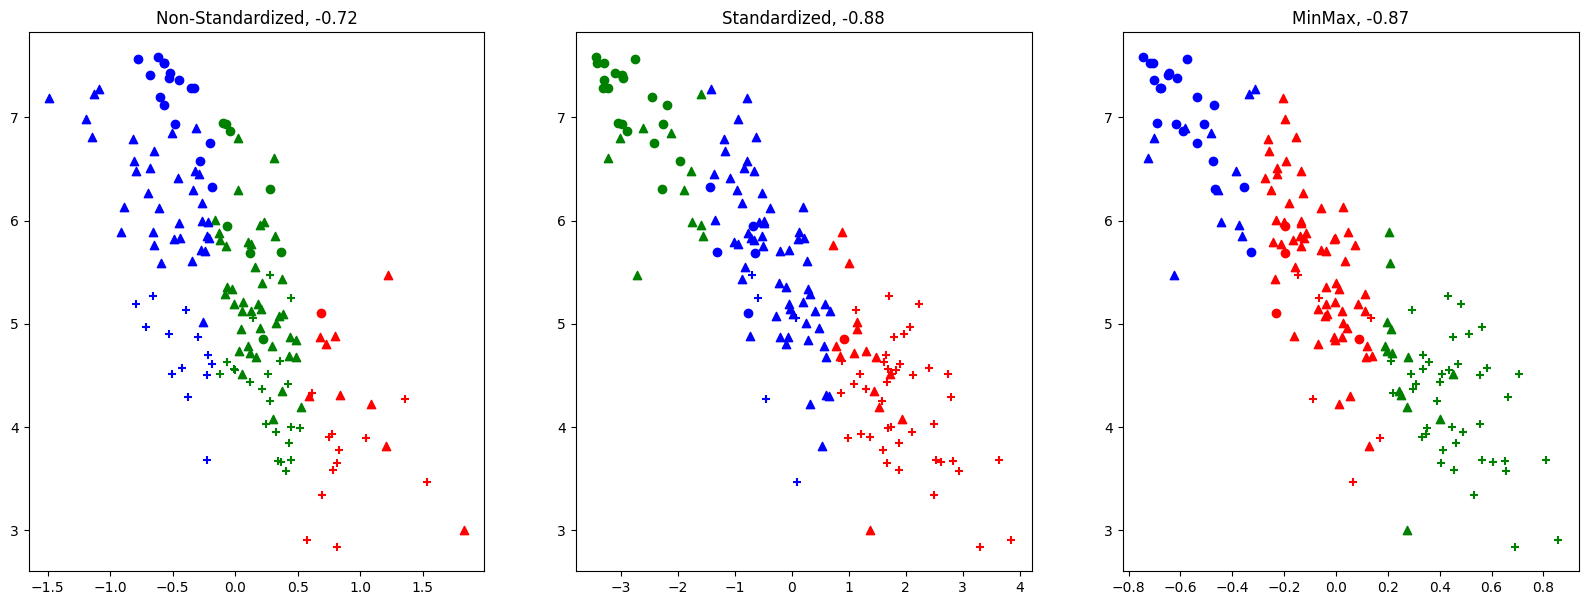

In [7]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

columns = ['economy', 'family', 'health', 'freedom', 'trust', 'generosity', 'dystopia_residual']
non_std_df = df[columns]
std_df = df[columns]
minmax_df = df[columns]

std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

pca = PCA(n_components=1)
kmeans = KMeans(n_clusters=3)

std_df[columns] = std_scaler.fit_transform(std_df[columns])
minmax_df[columns] = minmax_scaler.fit_transform(minmax_df[columns])

non_std_df['pca1'] = pca.fit_transform(non_std_df[columns])[:,0]
std_df['pca1'] = pca.fit_transform(std_df[columns])[:,0]
minmax_df['pca1'] = pca.fit_transform(minmax_df[columns])[:,0]

non_std_df = non_std_df.drop(columns, axis=1)
std_df = std_df.drop(columns, axis=1)
minmax_df = minmax_df.drop(columns, axis=1)

non_std_df['cluster'] = kmeans.fit(non_std_df[['pca1']], df['happiness_score']).labels_
std_df['cluster'] = kmeans.fit(std_df[['pca1']], df['happiness_score']).labels_
minmax_df['cluster'] = kmeans.fit(minmax_df[['pca1']], df['happiness_score']).labels_

non_std_df['cluster'] = non_std_df['cluster'].map({0: 'r', 1: 'b', 2: 'g', 3: 'y'})
std_df['cluster'] = std_df['cluster'].map({0: 'r', 1: 'b', 2: 'g', 3: 'y'})
minmax_df['cluster'] = minmax_df['cluster'].map({0: 'b', 1: 'g', 2: 'r', 3: 'y'})

fig, ax = plt.subplots(1, 3, figsize=(20, 7))
for idx, marker in zip(df.index, df['marker']):
    ax[0].scatter(non_std_df.loc[idx, 'pca1'], df.loc[idx, 'happiness_score'], c=non_std_df.loc[idx, 'cluster'], marker=marker)
    ax[1].scatter(std_df.loc[idx, 'pca1'], df.loc[idx, 'happiness_score'], c=std_df.loc[idx, 'cluster'], marker=marker)
    ax[2].scatter(minmax_df.loc[idx, 'pca1'], df.loc[idx, 'happiness_score'], c=minmax_df.loc[idx, 'cluster'], marker=marker)

ax[0].set_title(f'Non-Standardized, {np.corrcoef(non_std_df["pca1"], df["happiness_score"])[0,1]:.2f}')
ax[1].set_title(f'Standardized, {np.corrcoef(std_df["pca1"], df["happiness_score"])[0,1]:.2f}')
ax[2].set_title(f'MinMax, {np.corrcoef(minmax_df["pca1"], df["happiness_score"])[0,1]:.2f}')
plt.show()


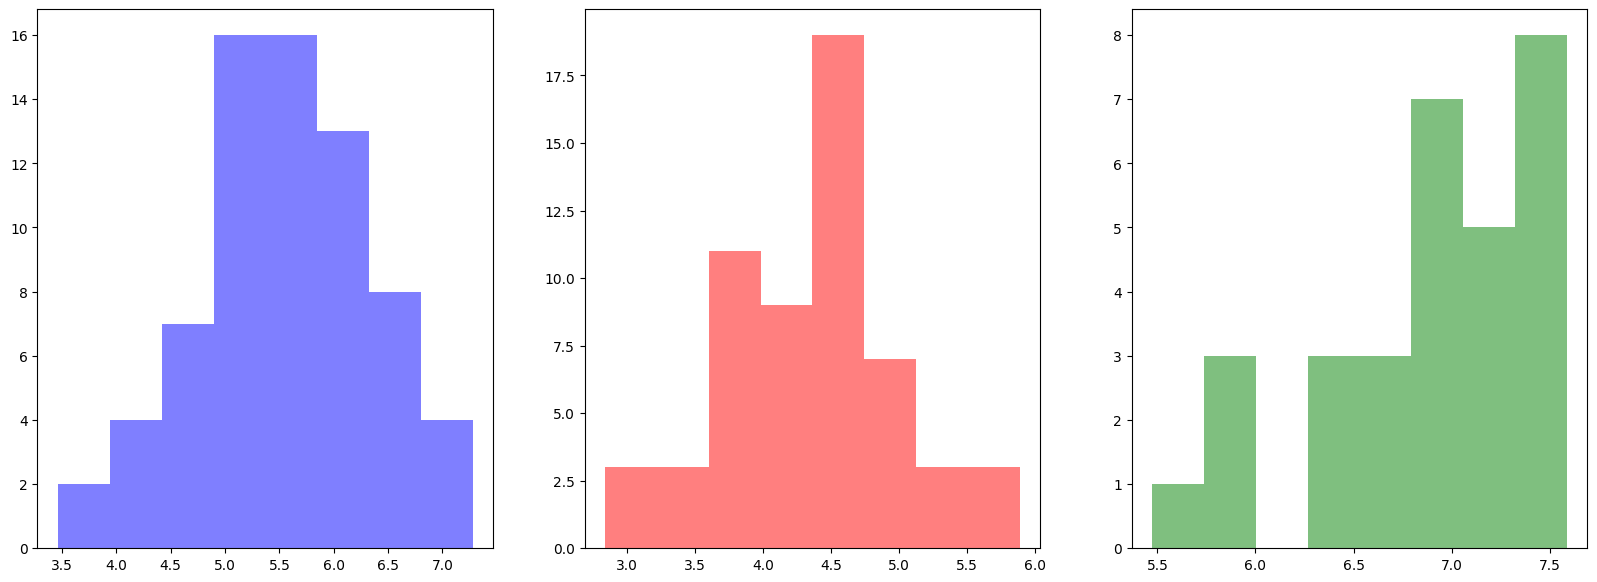

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(20, 7))
ax[0].hist(df.loc[std_df['cluster'] == 'b', 'happiness_score'], bins=8, color='b', alpha=0.5)
ax[1].hist(df.loc[std_df['cluster'] == 'r', 'happiness_score'], bins=8, color='r', alpha=0.5)
ax[2].hist(df.loc[std_df['cluster'] == 'g', 'happiness_score'], bins=8, color='g', alpha=0.5)

plt.show()